<a href="https://colab.research.google.com/github/PGV1000/data_mining/blob/main/%D0%9C%D0%B5%D0%B4%D0%B2%D0%B5%D0%B4%D0%B5%D0%B2_%D0%9F%D0%A0_%E2%84%968_%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D0%B8_%D0%BB%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №8. Линейная и логистическая регрессия**

## **Линейная регрессия**


###  **Задание №1. Прогнозирование продаж автомобилей**:


   - **Шаг 1**: Загрузите набор данных о продажах автомобилей, содержащий информацию о цене, возрасте, пробеге и других характеристиках.
     - **Совет**: Проверьте данные на наличие пропущенных значений и выбросов. Используйте `pandas` для обнаружения пропусков (`df.isnull().sum()`) и выбросов (например, с помощью метода межквартильного размаха - `df.boxplot()`).
     - **Совет**: Для пропущенных значений используйте стратегию заполнения средними значениями или медианой, чтобы минимизировать влияние на распределение данных (`df.fillna()`).

- Ссылка на набор данных: https://www.kaggle.com/datasets/gagandeep16/car-sales

In [ ]:
import kagglehub
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [ ]:
# Download latest version
path = kagglehub.dataset_download("gagandeep16/car-sales")
!cp -r {path} .
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/gagandeep16/car-sales/versions/1


In [ ]:
ds = pd.read_csv('/content/1/Car_sales.csv')

In [ ]:
print(ds.isnull().sum())

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [ ]:
float_columns = ds.select_dtypes(include=['float64']).columns
ds[float_columns] = ds[float_columns].fillna(ds[float_columns].mean())
print(ds.isnull().sum())

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64


<Axes: >

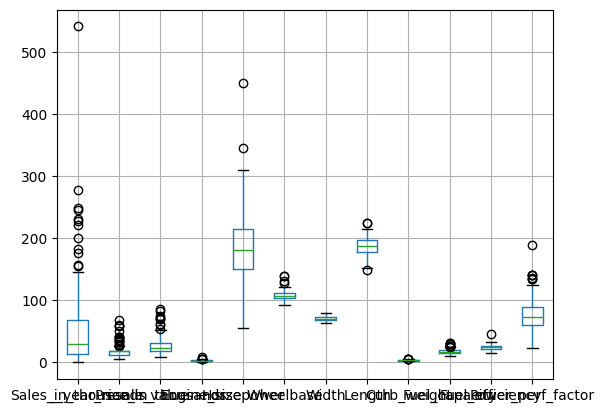

In [ ]:
ds.boxplot()

   - **Шаг 2**: Проведите предварительный анализ данных:
     - Постройте гистограммы для каждого числового признака, чтобы понять их распределение.
     - Постройте диаграммы рассеяния для выявления зависимостей между признаками и целевой переменной (ценой).
     - **Совет**: Используйте корреляционную матрицу для выявления сильных линейных зависимостей между признаками.

array([[<Axes: title={'center': 'Sales_in_thousands'}>,
        <Axes: title={'center': '__year_resale_value'}>,
        <Axes: title={'center': 'Price_in_thousands'}>],
       [<Axes: title={'center': 'Engine_size'}>,
        <Axes: title={'center': 'Horsepower'}>,
        <Axes: title={'center': 'Wheelbase'}>],
       [<Axes: title={'center': 'Width'}>,
        <Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Curb_weight'}>],
       [<Axes: title={'center': 'Fuel_capacity'}>,
        <Axes: title={'center': 'Fuel_efficiency'}>,
        <Axes: title={'center': 'Power_perf_factor'}>]], dtype=object)

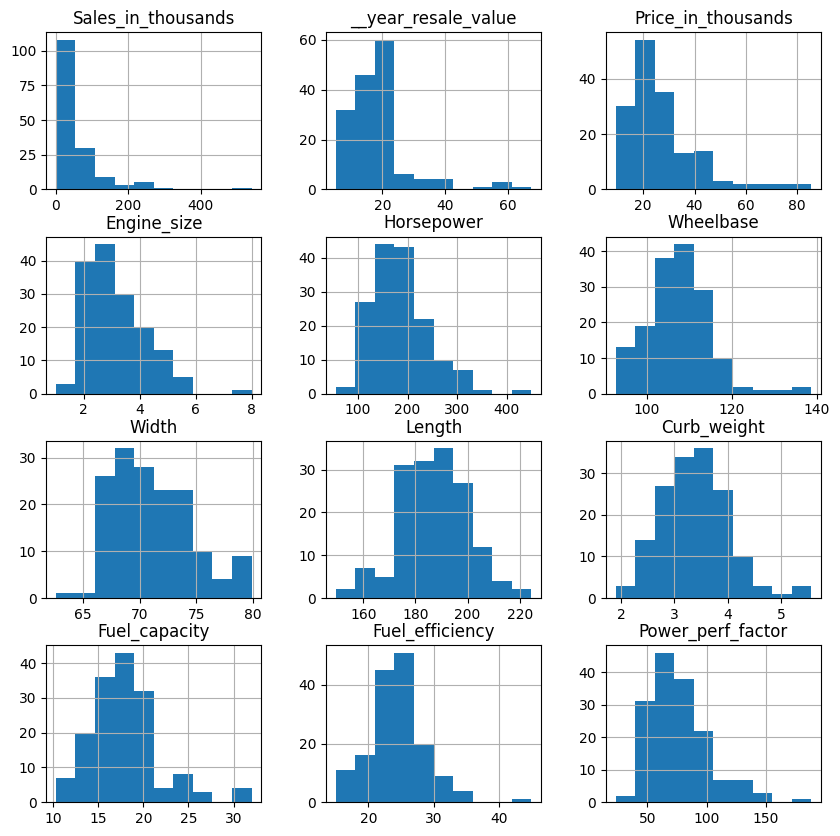

In [ ]:
ds[float_columns].hist(bins=10, figsize=(10, 10))

In [ ]:
ds['Latest_Launch'] = pd.to_datetime(ds['Latest_Launch'])
ds['Year'] = ds['Latest_Launch'].dt.year
ds['Month'] = ds['Latest_Launch'].dt.month
ds['Day'] = ds['Latest_Launch'].dt.day
ds.drop('Latest_Launch', axis=1, inplace=True)
ds['Manufacturer'] = ds['Manufacturer'].astype('category')
ds['Model'] = ds['Model'].astype('category')
ds['Vehicle_type'] = ds['Vehicle_type'].astype('category')
manufacturer_mapping = {category: i for i, category in enumerate(ds['Manufacturer'].cat.categories)}
model_mapping = {category: i for i, category in enumerate(ds['Model'].cat.categories)}
vehicle_type_mapping = {category: i for i, category in enumerate(ds['Vehicle_type'].cat.categories)}
ds['Manufacturer'] = ds['Manufacturer'].map(manufacturer_mapping)
ds['Model'] = ds['Model'].map(model_mapping)
ds['Vehicle_type'] = ds['Vehicle_type'].map(vehicle_type_mapping)
ds

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Year,Month,Day
0,0,79,16.919,16.360000,1,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,2012,2,2
1,0,143,39.384,19.875000,1,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,2011,6,3
2,0,25,14.114,18.225000,1,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,77.043591,2012,1,4
3,0,115,8.588,29.725000,1,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,2011,3,10
4,1,8,20.397,22.255000,1,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,2011,10,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,29,148,3.545,18.072975,1,24.400000,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812,2011,9,21
153,29,125,15.245,18.072975,1,27.500000,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495,2012,11,24
154,29,149,17.531,18.072975,1,28.800000,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978,2011,6,25
155,29,24,3.493,18.072975,1,45.500000,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357,2011,4,26


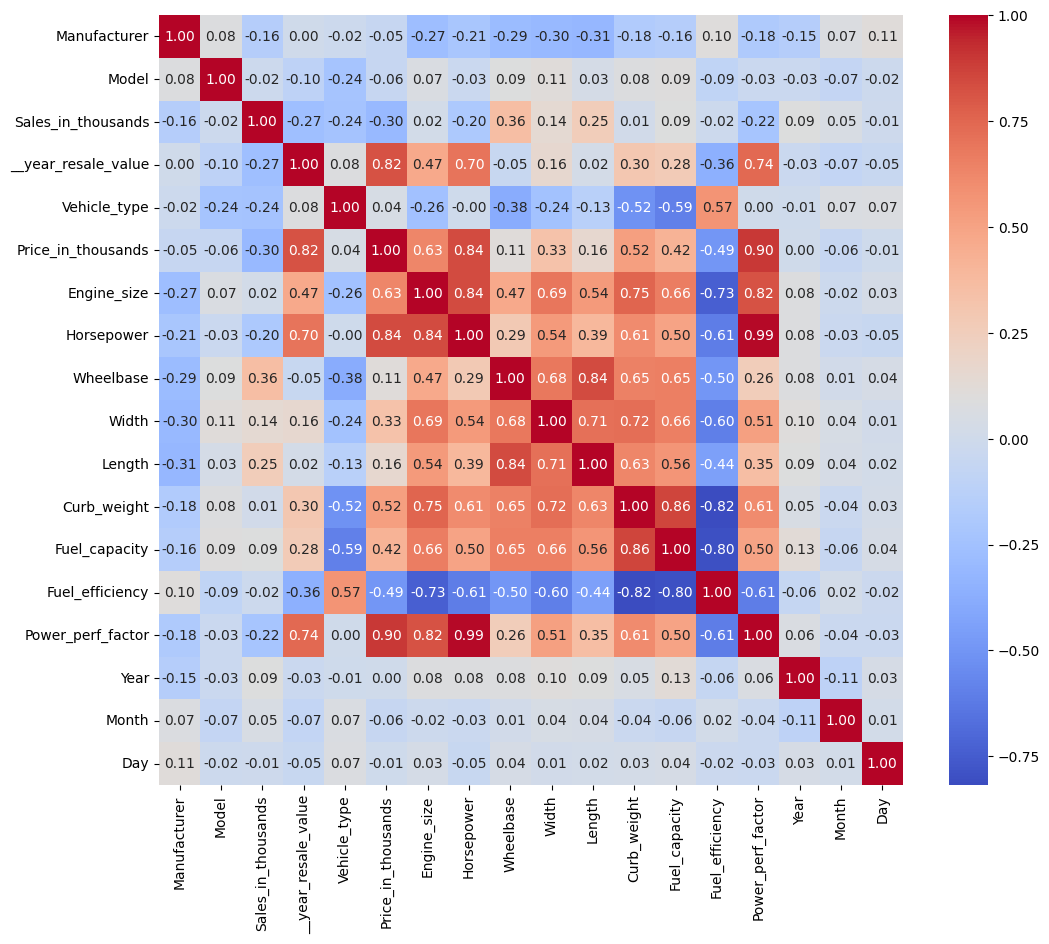

In [ ]:
correlation_matrix = ds.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

   - **Шаг 3**: Разделите данные на обучающую и тестовую выборки (например, 70% на обучение и 30% на тестирование) с помощью `train_test_split` из `sklearn.model_selection`.

In [ ]:
x = ds.drop('Price_in_thousands', axis=1)
y = ds['Price_in_thousands']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((109, 17), (48, 17), (109,), (48,))

   - **Шаг 4**: Постройте модель линейной регрессии для предсказания цены автомобиля.
     - Используйте библиотеку `scikit-learn` для создания и обучения модели с помощью `LinearRegression`.

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

# Получаем параметры модели
theta_0 = model.intercept_    # Свободный член (θ₀)
theta_1 = model.coef_[0]      # Коэффициент при x (θ₁)

print(f"θ₀ (свободный член): {theta_0:.2f}")
print(f"θ₁ (коэффициент при x): {theta_1:.2f}")

θ₀ (свободный член): -95.27
θ₁ (коэффициент при x): -0.01


   - **Шаг 5**: Оцените качество модели с использованием метрик MSE и R².
     - Выведите значения метрик и интерпретируйте их. Обратите внимание на то, насколько хорошо ваша модель предсказывает цены.

In [ ]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

MSE: 9.38
R²: 0.96


   - **Шаг 6**: Визуализируйте результаты:
     - Постройте график зависимости предсказанных цен от фактических.

In [ ]:
preds = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).sort_index()
preds.head()

,Actual,Predicted
5,33.950,33.330737
14,39.895,41.095233
16,39.665,41.067614
17,31.010,32.402632
19,13.260,12.225132


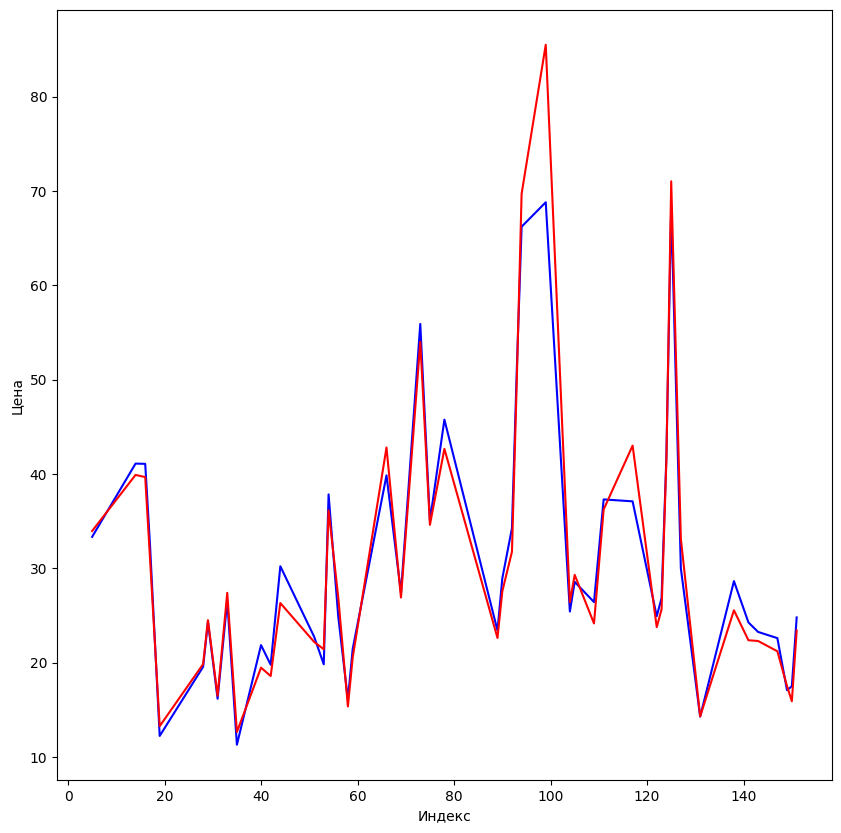

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(preds['Predicted'], color='blue')
plt.plot(preds['Actual'], color='red')
plt.xlabel('Индекс')
plt.ylabel('Цена')
plt.show()


### **Задание №2. Влияние погодных условий на урожайность**:


   - **Шаг 1**: Загрузите набор данных о погодных условиях и урожайности сельскохозяйственных культур.
     - **Совет**: Проверьте данные на наличие пропущенных значений и выбросов. Используйте стратегию заполнения пропусков средними значениями или медианой.

- Ссылка на набор данных: https://www.kaggle.com/datasets/waqi786/climate-change-impact-on-agriculture

In [ ]:
import os
import kagglehub
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [ ]:
!gdown --id 1iAlUjmL8vwqzOJs82SDpc99fNH6EnHB_ #Скопировать ID из ссылки на файл в гугл диске, предварительно нужно открыть доступ по ссылке.

In [ ]:
ds = pd.read_csv('/content/climate_change_impact_on_agriculture_2024.csv')
ds.info()

In [ ]:
ds.boxplot()

   - **Шаг 2**: Выполните анализ данных:
     - Постройте корреляционную матрицу для выявления зависимостей между признаками.
     - Постройте диаграммы рассеяния для ключевых признаков.
     - **Совет**: Удалите или преобразуйте признаки с низкой корреляцией с целевой переменной, чтобы улучшить модель.

In [ ]:
ds['Country'] = ds['Country'].astype('category')
ds['Region'] = ds['Region'].astype('category')
ds['Crop_Type'] = ds['Crop_Type'].astype('category')
ds['Adaptation_Strategies'] = ds['Adaptation_Strategies'].astype('category')
country_mapping = {category: i for i, category in enumerate(ds['Country'].cat.categories)}
region_mapping = {category: i for i, category in enumerate(ds['Region'].cat.categories)}
crop_type_mapping = {category: i for i, category in enumerate(ds['Crop_Type'].cat.categories)}
adaptation_mapping = {category: i for i, category in enumerate(ds['Adaptation_Strategies'].cat.categories)}
ds['Country'] = ds['Country'].map(country_mapping)
ds['Region'] = ds['Region'].map(region_mapping)
ds['Crop_Type'] = ds['Crop_Type'].map(crop_type_mapping)
ds['Adaptation_Strategies'] = ds['Adaptation_Strategies'].map(adaptation_mapping)
ds

In [ ]:
correlation_matrix = ds.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
x = ds[['Average_Temperature_C', 'CO2_Emissions_MT', 'Economic_Impact_Million_USD']]
y = ds['Crop_Yield_MT_per_HA']
x.hist(bins=10, figsize=(10, 10))

   - **Шаг 3**: Разделите данные на обучающую и тестовую выборки.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

   - **Шаг 4**: Постройте модель линейной регрессии для оценки влияния температуры и уровня осадков на урожайность.
     - Используйте библиотеку `scikit-learn` для создания и обучения модели.

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

   - **Шаг 5**: Проведите оценку точности модели.
     - Выведите значения метрик MSE и R² и интерпретируйте их.

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
mse  = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

   - **Шаг 6**: Визуализируйте данные и результаты модели:
     - Постройте график зависимости предсказанных значений от фактических.

In [ ]:
preds = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).sort_index()
preds.head()

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(preds['Predicted'][:100], color='blue')
plt.plot(preds['Actual'][:100], color='red')
plt.xlabel('Индекс')
plt.ylabel('Урожайность')
plt.show()

## **Логистическая регрессия**


### **Задание №3. Классификация клиентов банка**:


   - **Шаг 1**: Загрузите набор данных о клиентах банка, включающий данные о возрасте, доходе, кредитной истории и других характеристиках.
     - **Совет**: Проверьте данные на наличие пропущенных значений и выбросов. Используйте стратегию заполнения пропусков средними значениями или медианой.

- Ссылка на набор данных: https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing/data

In [ ]:
import os
import kagglehub
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, f1_score, recall_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [ ]:
path = kagglehub.dataset_download("henriqueyamahata/bank-marketing")
!cp -r {path} .
print("Path to dataset files:", path)

   - **Шаг 2**: Проведите анализ данных и предобработку:
     - Закодируйте категориальные переменные с помощью `OneHotEncoder` или `pd.get_dummies`.
     - Нормализуйте числовые признаки с помощью `StandardScaler` для улучшения обучения модели.
     - **Совет**: Убедитесь, что все признаки имеют одинаковый масштаб, чтобы избежать доминирования одного признака над другими.

In [ ]:
ds = pd.read_csv('/content/1/bank-additional-full.csv', sep=';')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
print(ds.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [ ]:
ds.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
object_columns = ds.select_dtypes(include=['object']).columns
ds = pd.get_dummies(ds, columns=object_columns, drop_first=True)
ds

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,False,True,False,True
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,False,True,False,False
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,False,True,False,False
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,False,True,False,True


   - **Шаг 3**: Разделите данные на обучающую и тестовую выборки.


In [ ]:
x = ds.drop('y_yes', axis=1)
y = ds['y_yes']

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((28831, 53), (28831,), (12357, 53), (12357,))

   - **Шаг 4**: Постройте модель логистической регрессии для предсказания вероятности открытия депозитного счета клиентом.
     - Используйте библиотеку `scikit-learn` для создания и обучения модели с помощью `LogisticRegression`.

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

   - **Шаг 5**: Оцените качество модели с использованием метрик точности, полноты и F1-меры.
     - Выведите значения метрик и интерпретируйте их. Обратите внимание на баланс между точностью и полнотой.
    - Постройте матрицу ошибок с помощью `confusion_matrix` и визуализируйте ее с помощью `seaborn.heatmap`.

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f = f1_score(y_test, y_pred)
print(f'Accuracy: {acc:.2f}')
print(f'Recall: {rec:.2f}')
print(f'F1_score: {f:.2f}')

Accuracy: 0.91
Recall: 0.41
F1_score: 0.51




   

   
   

   

   
   - **Шаг 6**: Визуализируйте ROC-кривую и вычислите AUC для оценки модели.
     - Используйте `roc_curve` и `auc` из `sklearn.metrics` для построения и расчета.

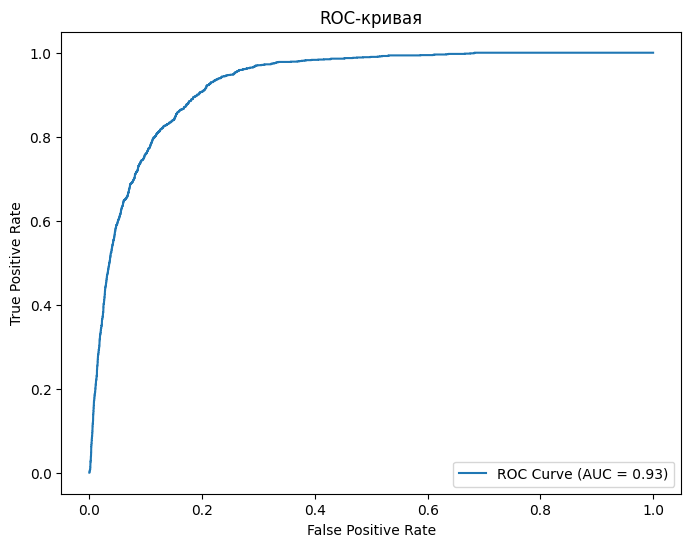

In [ ]:
y_pred_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)
y_pred_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {y_pred_auc:.2f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.legend()
plt.show()

### **Задание №4. Распознавание спама**:


   - **Шаг 1**: Загрузите набор данных с текстами электронных писем, маркированных как "спам" или "не спам".
     - **Совет**: Проверьте данные на наличие пропущенных значений и оцените, какие признаки могут быть важными для классификации.

- Ссылка на набор данных: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [ ]:
import os
import kagglehub
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, f1_score, recall_score, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [ ]:
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")
!cp -r {path} .
print("Path to dataset files:", path)

100%|██████████| 211k/211k [00:00<00:00, 31.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/sms-spam-collection-dataset/versions/1


In [ ]:
ds = pd.read_csv('/content/1/spam.csv', encoding='latin-1')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
ds = ds.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


   - **Шаг 2**: Выполните предварительную обработку текстов:
     - Выполните токенизацию и векторизацию с помощью `Word2Vec` или `Doc2Vec`.

In [ ]:
tokens = [TaggedDocument(words=row.split(), tags=[i]) for i, row in enumerate(ds['v2'])]
doc_2_vec = Doc2Vec(tokens, epochs=100)

In [ ]:
ds['v1'] = ds['v1'].astype('category')
category_mapping = dict(enumerate(ds['v1'].cat.categories))
ds['v1'] = ds['v1'].cat.codes

In [ ]:
x = [doc_2_vec.infer_vector(token.words) for token in tokens]
y = ds['v1']

   - **Шаг 3**: Разделите данные на обучающую и тестовую выборки.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

   - **Шаг 4**: Постройте модель логистической регрессии для классификации писем на спам и не спам.
     - Используйте библиотеку `scikit-learn` для создания и обучения модели с помощью `LogisticRegression`.
     - Сравните результаты с моделью `MultinomialNB` *(Наивного Байеса)*

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
ds_bayes = pd.read_csv('/content/1/spam.csv', encoding='latin-1')
ds_bayes['v1'] = ds_bayes['v1'].astype('category')
category_mapping = dict(enumerate(ds_bayes['v1'].cat.categories))
ds_bayes['v1'] = ds_bayes['v1'].cat.codes
ds_bayes = ds_bayes.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
ds_bayes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int8  
 1   v2      5572 non-null   object
dtypes: int8(1), object(1)
memory usage: 49.1+ KB


In [ ]:
x_bayes = ds_bayes['v2']
y_bayes = ds_bayes['v1']

In [ ]:
x_train_bayes, x_test_bayes, y_train_bayes, y_test_bayes = train_test_split(ds_bayes['v2'], ds_bayes['v1'], test_size=0.3, random_state=1)
x_train_bayes.shape, y_train_bayes.shape, x_test_bayes.shape, y_test_bayes.shape

((3900,), (3900,), (1672,), (1672,))

In [ ]:
# Определение шагов конвейера
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),      # Преобразование текста в числовые признаки
    ('classifier', MultinomialNB())         # Мультиномиальный наивный байесовский классификатор
])

In [ ]:
pipeline.fit(x_train_bayes, y_train_bayes)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [ ]:
y_pred_bayes = pipeline.predict(x_test_bayes)

   - **Шаг 5**: Оцените качество моделей с помощью матрицы ошибок и ROC-кривой.
     - Постройте матрицу ошибок с помощью `confusion_matrix` и визуализируйте ее с помощью `seaborn.heatmap`.
     - Постройте ROC-кривую и вычислите AUC.

Text(0.5, 1.0, 'bayes')

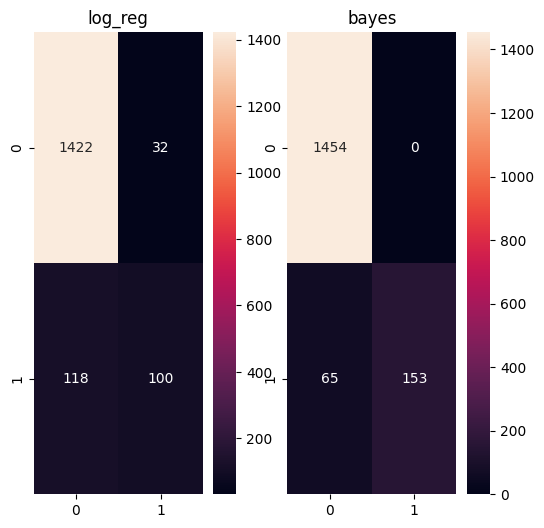

In [ ]:
conf_mat_log=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
plt.subplot(1, 2, 1)
sns.heatmap(conf_mat_log,annot=True,fmt='d')
plt.title('log_reg')
conf_mat_bayes = confusion_matrix(y_test_bayes, y_pred_bayes)
plt.subplot(1, 2, 2)
sns.heatmap(conf_mat_bayes, annot=True, fmt='d')
plt.title('bayes')

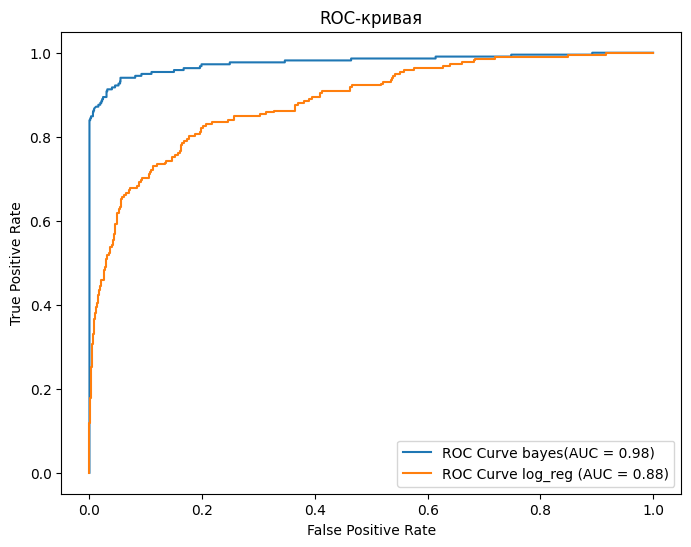

In [ ]:
y_pred_prob = model.predict_proba(x_test)[:, 1]
y_pred_prob_bayes = pipeline.predict_proba(x_test_bayes)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)
fpr_bayes, tpr_bayes, thresholds_bayes = roc_curve(y_test_bayes, y_pred_prob_bayes, pos_label=1)

y_pred_auc = auc(fpr, tpr)
y_pred_auc_bayes = auc(fpr_bayes, tpr_bayes)


plt.figure(figsize=(8, 6))
plt.plot(fpr_bayes, tpr_bayes, label=f'ROC Curve bayes(AUC = {y_pred_auc_bayes:.2f})')
plt.plot(fpr, tpr, label=f'ROC Curve log_reg (AUC = {y_pred_auc:.2f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.legend()
plt.show()

   - **Шаг 6**: Визуализируйте результаты классификации и сравните их с исходными метками.
     - Приведите примеры писем, которые были неправильно классифицированы, и напишите возможные причины ошибок.

In [ ]:
preds = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).sort_index()
preds.head()

,Actual,Predicted
3,0,0
4,0,0
5,1,1
11,1,1
12,1,0


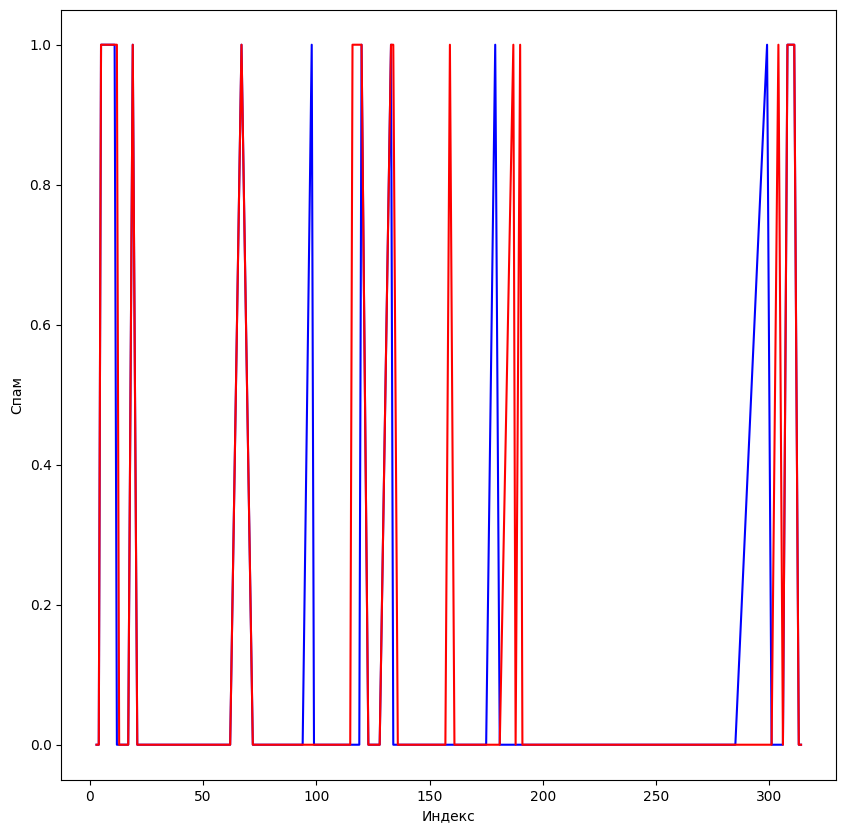

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(preds['Predicted'][:100], color='blue')
plt.plot(preds['Actual'][:100], color='red')
plt.xlabel('Индекс')
plt.ylabel('Cпам')
plt.show()

In [28]:
incorrect_predictions = preds[preds['Actual'] != preds['Predicted']]
incorrect_predictions

,Actual,Predicted
12,1,0
98,0,1
116,1,0
119,1,0
134,1,0
...,...,...
5378,1,0
5410,0,1
5533,0,1
5537,1,0


In [36]:
incorrect_messages = ds.loc[incorrect_predictions.index, 'v2']
incorrect_message_full = incorrect_messages.iloc[1]
incorrect_message_full

'Hi. Wk been ok - on hols now! Yes on for a bit of a run. Forgot that i have hairdressers appointment at four so need to get home n shower beforehand. Does that cause prob for u?\\"\rham"'

Возможно, модель неправльно предсказала класс письма из-за строки "now!", похожие конструкции часто встречаются в письмах со спамом.
